# Basic EDA on PIMA India dataset

In [2]:
#Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('E:/Analytics/DataCamp/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Overview of the dataset and its attributes

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

# Significance of the columns:

    Pregnancies - Number of times Pregnant.
    Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
    BloodPressure - Diastolic blood pressure (mm Hg).
    SkinThickness - Triceps skin fold thickness (mm).
    Insulin - 2-Hour serum insulin (mu U/ml).
    BMI - Body mass index ( BMI weight in kg/(height in m)^2).
    DiabetesPedigreeFunction - Diabetes pedigree function.
    Age - Age in year.
    Outcome - 1 if Patient has diabetes, 0 otherwise.


# What is DiabetesPedigreeFunction Column signifying?

A function which scores the likelihood of diabetes based on family history. It provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient.


In [4]:
# Analysing dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Analysing Missing Values

Since missing values are inserted as 0, we have to recode it as nan

In [6]:
# Replacing 0 values with nan in all the columns except in pregnancies and outcome column
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [7]:
missing_values = df.isnull().sum() 
missing_values = missing_values[missing_values>0]
missing_values.sort_values(inplace=True)
missing_values

Glucose            5
BMI               11
BloodPressure     35
SkinThickness    227
Insulin          374
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


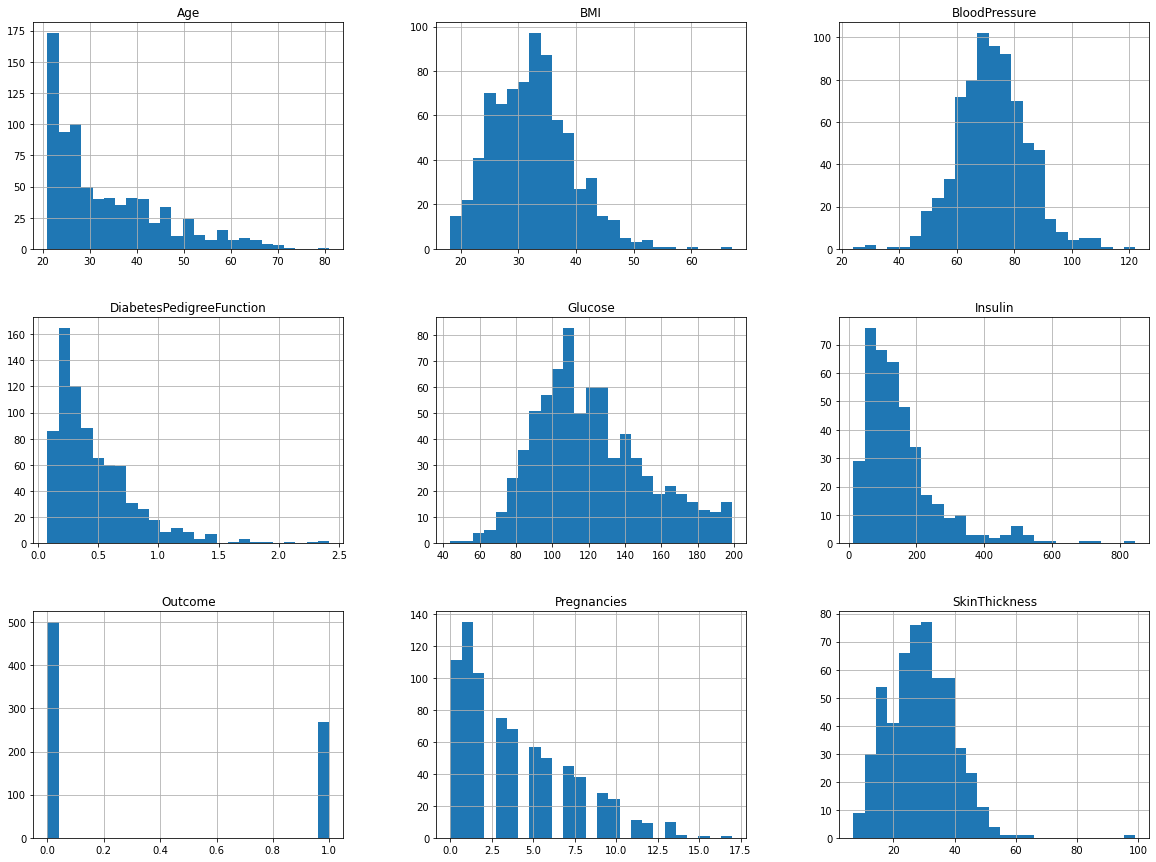

In [9]:
df.hist(bins=25, figsize=(20,15));

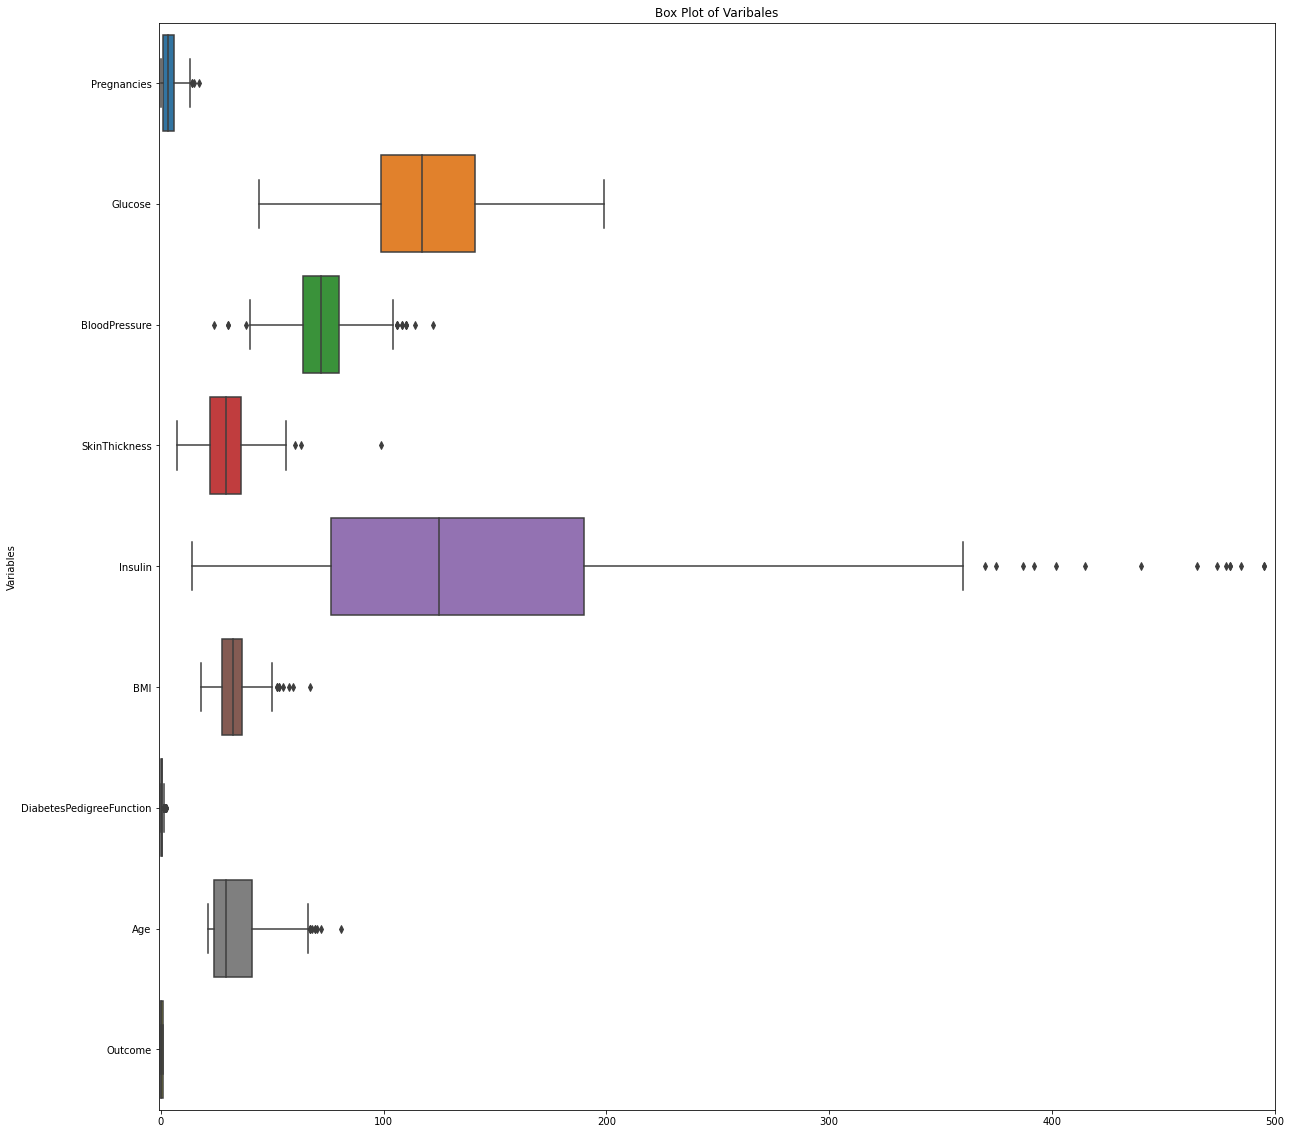

In [10]:
f, ax = plt.subplots(figsize=(20,20))
ax.set(xlim=(-1, 500))
plt.ylabel('Variables')
plt.title('Box Plot of Varibales')
ax=sns.boxplot(data=df, orient='h')

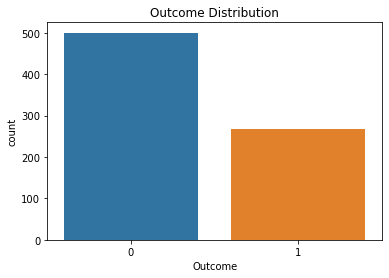

In [11]:
ax=sns.countplot(x='Outcome', data=df).set(title='Outcome Distribution')

In [12]:
corr_matrix = df.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.494650
BMI                         0.313680
Insulin                     0.303454
SkinThickness               0.259491
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
BloodPressure               0.170589
Name: Outcome, dtype: float64

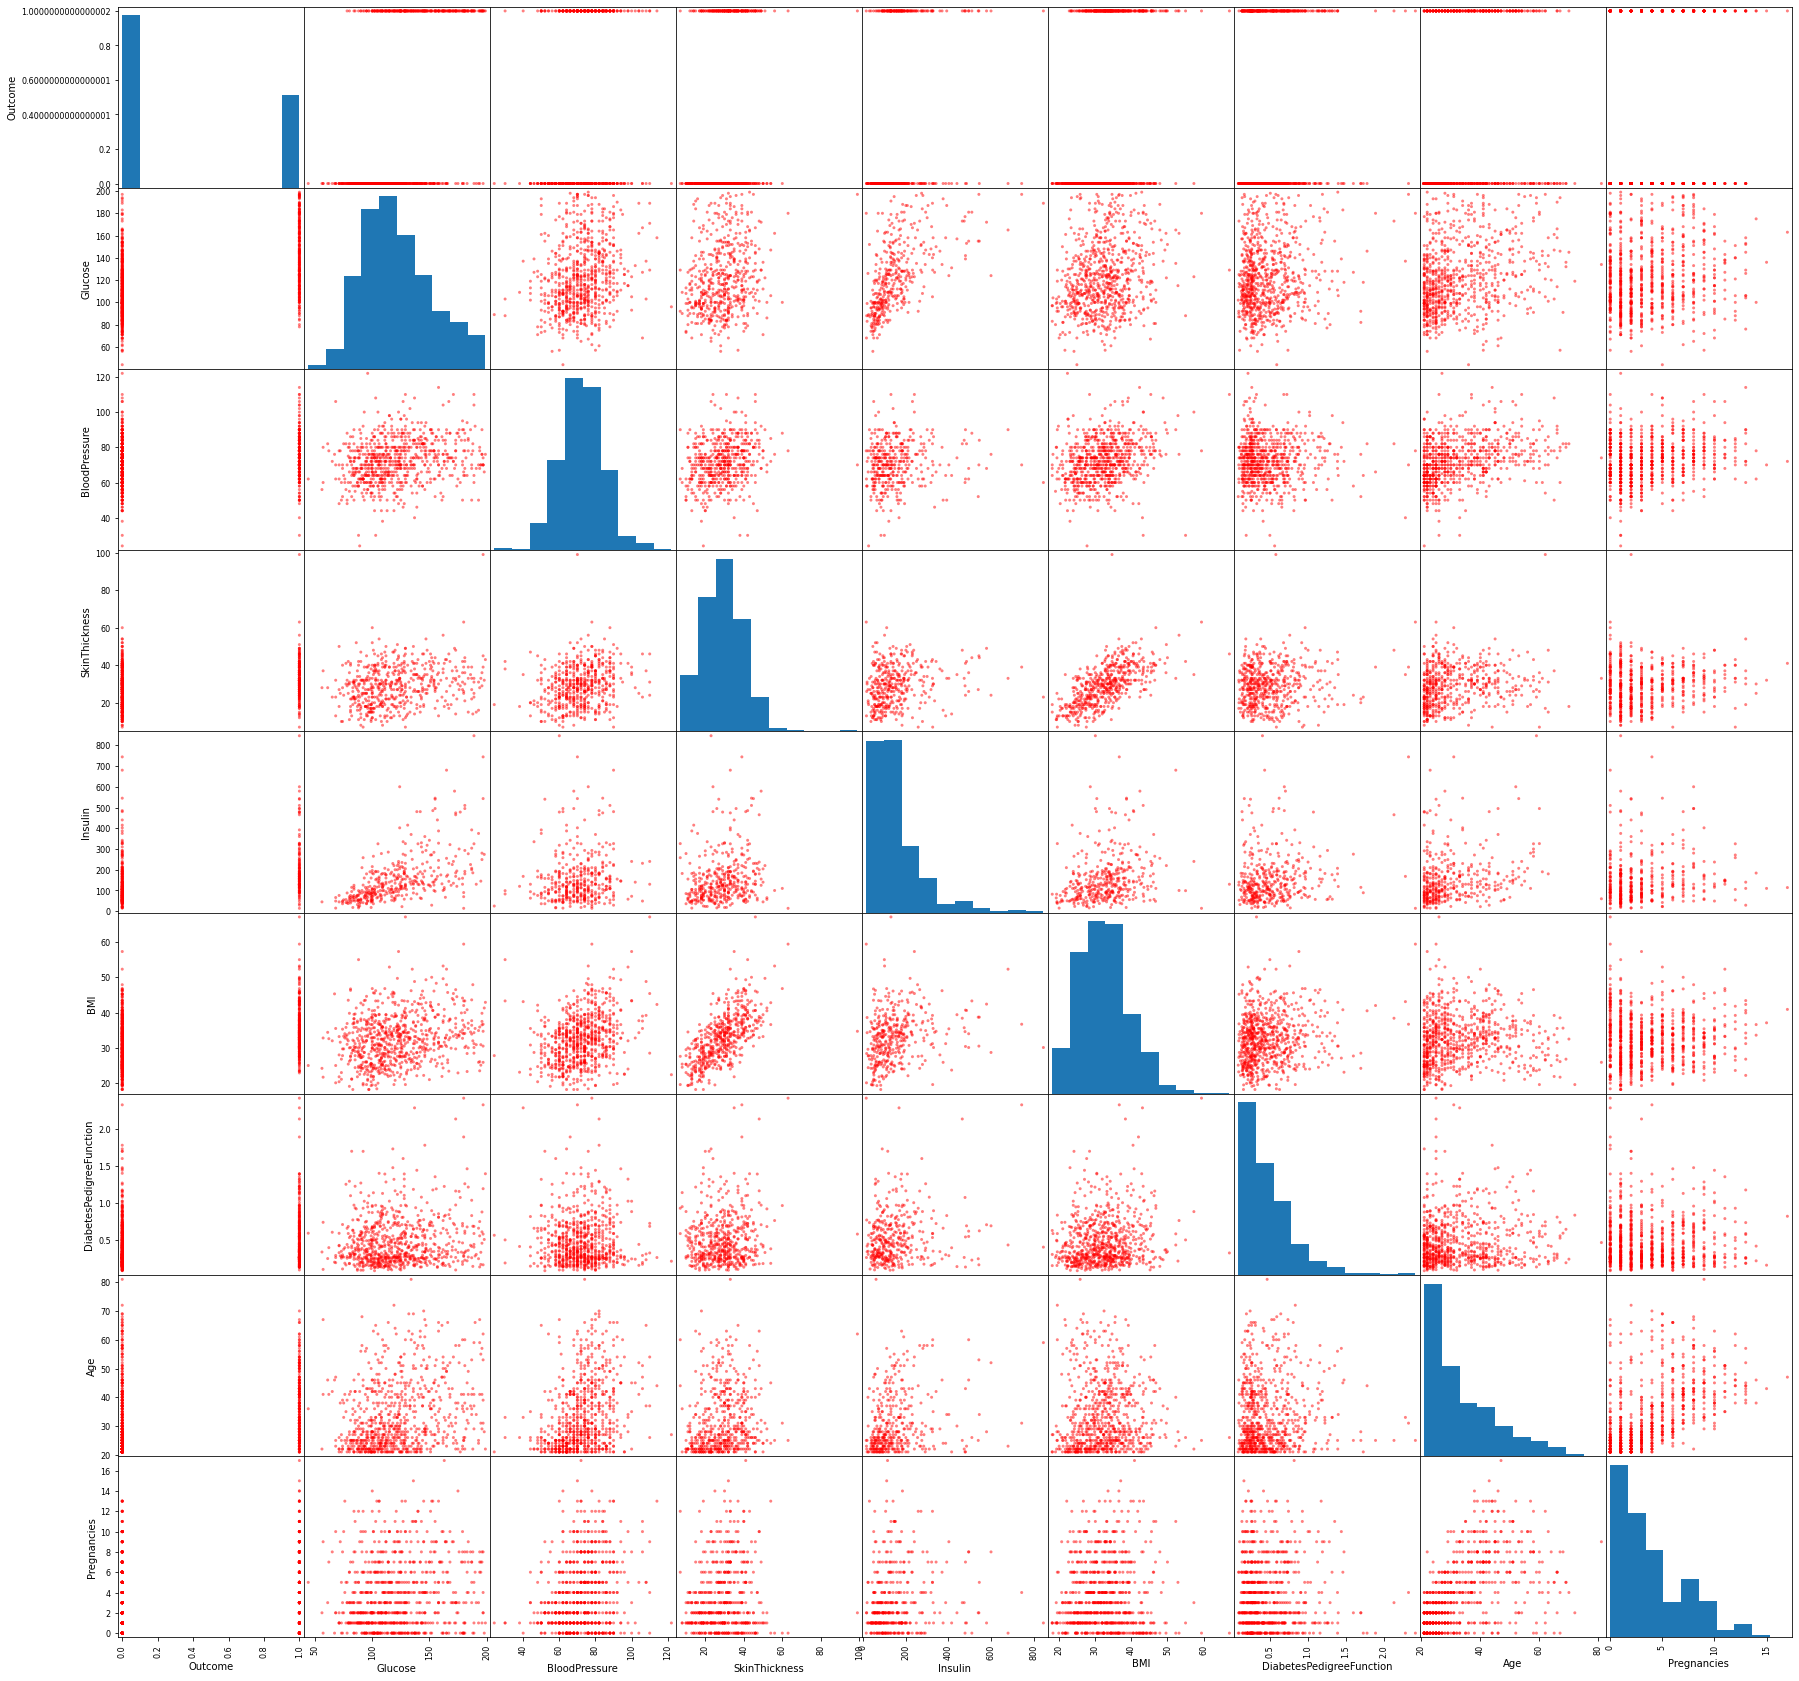

In [13]:
attributes = ['Outcome','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies']
pd.plotting.scatter_matrix(df[attributes], figsize=(30,30), color='r');

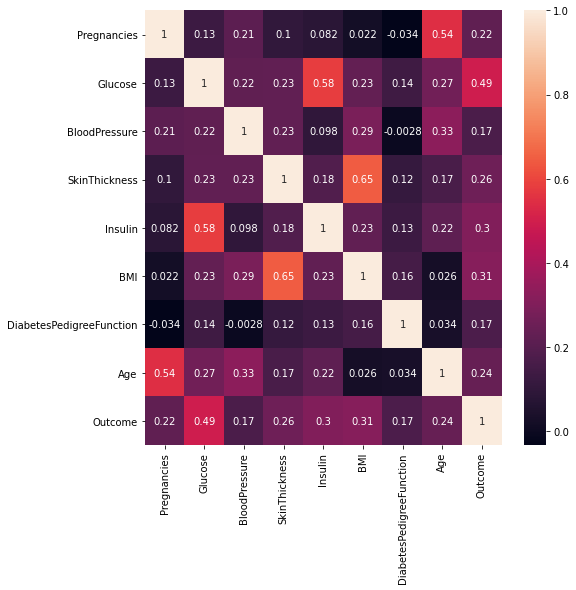

In [14]:
fig, ax= plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True)

# Handling missing values
Since most of the variables have outliers except in glucose, we will use median to fill the missing values in all the columns. We will first divide the data in two parts based on outcome and then fill the respective median values in the attributes

In [15]:
# Dividing data based on the outcome
dy = df[df['Outcome'] == 1]
dn = df[df['Outcome'] == 0]
print(dy.head())
print(dn.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
2            8    183.0           64.0            NaN      NaN  23.3   
4            0    137.0           40.0           35.0    168.0  43.1   
6            3     78.0           50.0           32.0     88.0  31.0   
8            2    197.0           70.0           45.0    543.0  30.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
2                     0.672   32        1  
4                     2.288   33        1  
6                     0.248   26        1  
8                     0.158   53        1  
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1             1     85.0           66.0           29.0      NaN  26.6   
3             1     89.0           66.0           23.0     94.0  28.1   
5             5    116.0           74.0            NaN      NaN  25.6   
7          

In [16]:
dy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,266.000000,252.000000,180.000000,130.000000,266.000000,268.000000,268.000000,268.0
mean,4.865672,142.319549,75.321429,33.000000,206.846154,35.406767,0.550500,37.067164,1.0
std,3.741239,29.599199,12.299866,10.327595,132.699898,6.614982,0.372354,10.968254,0.0
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000,1.0
25%,1.750000,119.000000,68.000000,27.000000,127.500000,30.900000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.500000,32.000000,169.500000,34.300000,0.449000,36.000000,1.0
75%,8.000000,167.000000,84.000000,39.000000,239.250000,38.925000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [17]:
dn.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,497.000000,481.000000,361.000000,264.000000,491.000000,500.000000,500.000000,500.0
mean,3.298000,110.643863,70.877339,27.235457,130.287879,30.859674,0.429734,31.190000,0.0
std,3.017185,24.776906,12.161223,10.026491,102.482237,6.560737,0.299085,11.667655,0.0
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,93.000000,62.000000,19.000000,66.000000,25.600000,0.229750,23.000000,0.0
50%,2.000000,107.000000,70.000000,27.000000,102.500000,30.100000,0.336000,27.000000,0.0
75%,5.000000,125.000000,78.000000,33.000000,161.250000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.000000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [18]:
# filling missing value with median
dy = dy.fillna(dy.median())
dy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
dn = dn.fillna(dn.median())
dn.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
#concatenating dy and dn as df_new
df_new = pd.concat([dy,dn])
df_new.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


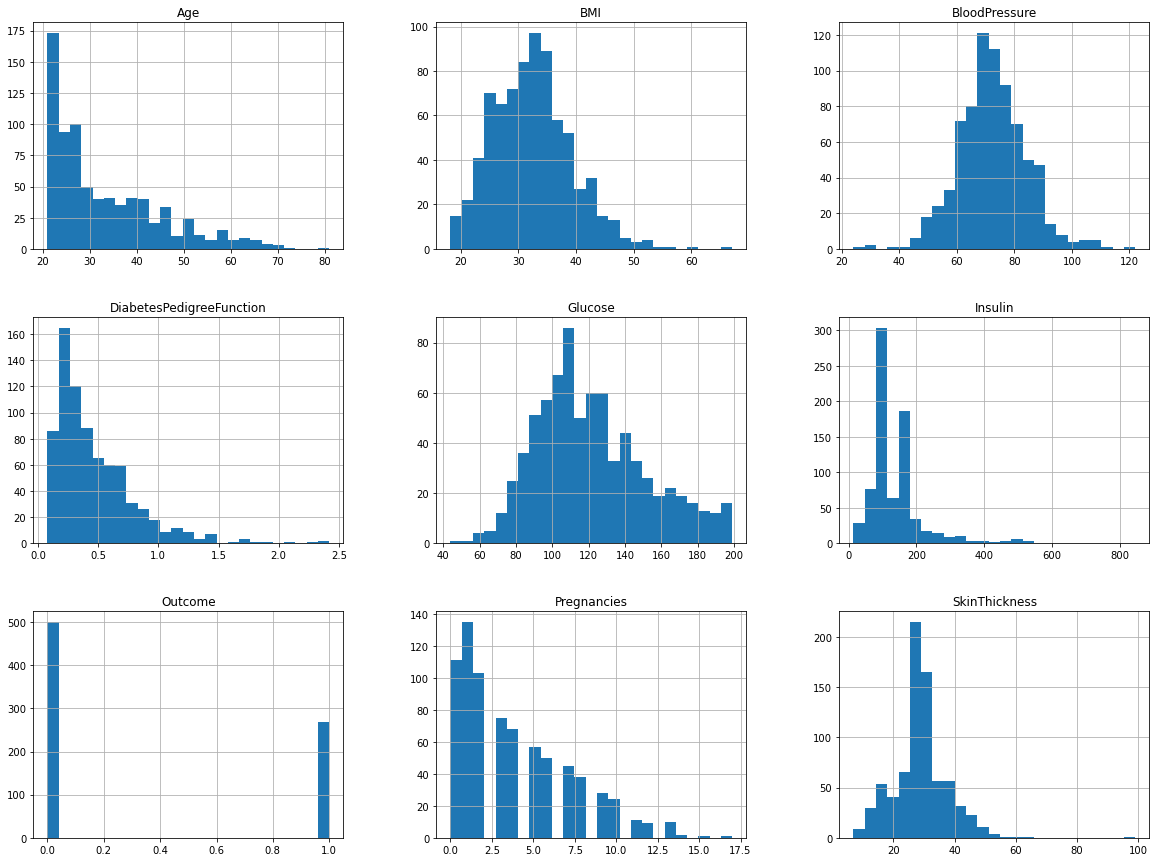

In [21]:
df_new.hist(bins=25, figsize=(20,15));

In [59]:
# Separating the target variable
X = df_new.drop('Outcome', axis=1)
y = df_new['Outcome']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
#setting seed for reproducibility
SEED = 1

# SVM classification to predict the diabetes
I will be building the model in 3 steps Fist, I will build a raw SVM classification model without scalling the features. Secondly, I will use Power Transformer to scale the data is. Apart from glucose, all the variables contain large outliers, thus standard scaler or other scalling method which get influenced by outliers is not a good option. Then I will tune hyper-parameters to improve the model Finally, I will try bagging with SVM classification

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=SEED)

#Instantiate SVC
svc= SVC(probability=True , random_state=SEED)

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_pred_prob = svc.predict_proba(X_test)[:,1]

score = accuracy_score(y_test, y_pred)
print('accuracy_score:', score)

cm = confusion_matrix(y_test,y_pred)
print(cm)

print(classification_report(y_test, y_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_prob))

accuracy_score: 0.8701298701298701
[[131  19]
 [ 11  70]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       150
           1       0.79      0.86      0.82        81

    accuracy                           0.87       231
   macro avg       0.85      0.87      0.86       231
weighted avg       0.87      0.87      0.87       231

roc_auc_score: 0.8970370370370371


# Scaling the data with Power Transformer

In [62]:
# Scaling the data with Power Transformer
X = PowerTransformer(method = 'yeo-johnson').fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=SEED)

#Instantiate SVC
svc= SVC(probability=True, random_state=SEED)

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_pred_prob = svc.predict_proba(X_test)[:,1]

score = accuracy_score(y_test, y_pred)
print('accuracy_score:', score)

cm = confusion_matrix(y_test,y_pred)
print(cm)

print(classification_report(y_test, y_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_prob))

accuracy_score: 0.8701298701298701
[[133  17]
 [ 13  68]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       150
           1       0.80      0.84      0.82        81

    accuracy                           0.87       231
   macro avg       0.86      0.86      0.86       231
weighted avg       0.87      0.87      0.87       231

roc_auc_score: 0.8949794238683128


# Using Hyper-parameter tunning to improve the scaled mode

In [63]:
# Inspecting the HyperParameter of Logistic Regression and Identifying the best among them
print(svc.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [64]:
# Defining the grid of hyper-parameters
params_svc = dict(gamma=[0.1,1,10] , C=[0.01, 0.1, 1, 10, 100])

#Instantiate a 10-fold CV grid search
grid_svc = GridSearchCV(estimator = svc, param_grid = params_svc, scoring = 'accuracy', n_jobs=-1)

grid_svc.fit(X_train, y_train)

#Extracting best hyper-params from grid_dt
best_hyperparams = grid_svc.best_params_
print(best_hyperparams)

{'C': 1, 'gamma': 0.1}


In [65]:
#Extracting best CV score frome grid_dt
best_CV_score = grid_svc.best_score_
print(best_CV_score)

0.8323295257874698


In [66]:
#Extracting best model
best_model = grid_svc.best_estimator_

#Evaluating test set accuracy 
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:,1]

score = accuracy_score(y_test, y_pred)
print('accuracy_score:', score)

cm = confusion_matrix(y_test,y_pred)
print(cm)

print(classification_report(y_test, y_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_prob))

accuracy_score: 0.8658008658008658
[[133  17]
 [ 14  67]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       150
           1       0.80      0.83      0.81        81

    accuracy                           0.87       231
   macro avg       0.85      0.86      0.85       231
weighted avg       0.87      0.87      0.87       231

roc_auc_score: 0.891358024691358


# Using Bagging to improve the model

In [67]:
from sklearn.ensemble import BaggingClassifier

#Instantiating DecisionTree Classifier based on best params
svc_best = SVC(C=1, gamma=0.1, random_state=SEED)

#Instantiating Bagging Classifier with best_model based on hyper parameter tunning
bc = BaggingClassifier(base_estimator = svc_best, n_estimators=300, n_jobs=-1)

bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
y_pred_prob = bc.predict_proba(X_test)[:,1]

score = accuracy_score(y_test, y_pred)
print('accuracy_score:', score)

cm = confusion_matrix(y_test,y_pred)
print(cm)

print(classification_report(y_test, y_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_prob))

accuracy_score: 0.8787878787878788
[[135  15]
 [ 13  68]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       150
           1       0.82      0.84      0.83        81

    accuracy                           0.88       231
   macro avg       0.87      0.87      0.87       231
weighted avg       0.88      0.88      0.88       231

roc_auc_score: 0.9071604938271605


# Conclusion

Started with EDA using descriptive statistics
Handling missing values - Used median values of respective outcomes to treat the missing values.
In this model, I have used stratified train test split.
Support Vector Classification and measured the performace based on confusion matrix, classification report, roc_auc score and accuracy score.
Scaled the data with Power Transformation method, as all the features contain outliers. No siginficant impact of scaling the data on the model's accuracy. In fact after scaling the data the racall rate of diabetic patient reduced to 68
Tuned Hyper-paramaters of Support Vector Classification through GridSearchCV
Used Bagging Classifier with best parameters to run build the model. But no significant improvement in overall accuracy and recall rate of diabetic patient remained at 68. 
If the priority is to identify the diabetic patient, then we may opt for basic svc model.